<a href="https://colab.research.google.com/github/s5263er/GameStop-Sentiment-and-Price-Analysis/blob/main/FIN_INFO_RET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#IMPORTS
!pip install yfinance
import yfinance as yf
import pandas as pd
import datetime 
import datetime 
import matplotlib.pyplot as plt
import math
import string
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#LAST 10 YEAR STOCK PRICE
start = datetime.datetime(2013,3,28) 
end = datetime.datetime(2023, 3 ,28)
GME = yf.Ticker("GME") 
df_gme = GME.history(start=start, end=end)
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-03-28 00:00:00-04:00,4.459722,5.063772,4.459722,4.940136,39372800,0.0,0.0
2013-04-01 00:00:00-04:00,4.945435,5.311043,4.933071,5.256290,28086000,0.0,0.0
2013-04-02 00:00:00-04:00,5.252759,5.358733,5.132655,5.341070,16349200,0.0,0.0
2013-04-03 00:00:00-04:00,5.346369,5.406421,5.298681,5.342836,18020400,0.0,0.0
2013-04-04 00:00:00-04:00,5.335770,5.492965,5.208602,5.279251,17995200,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0


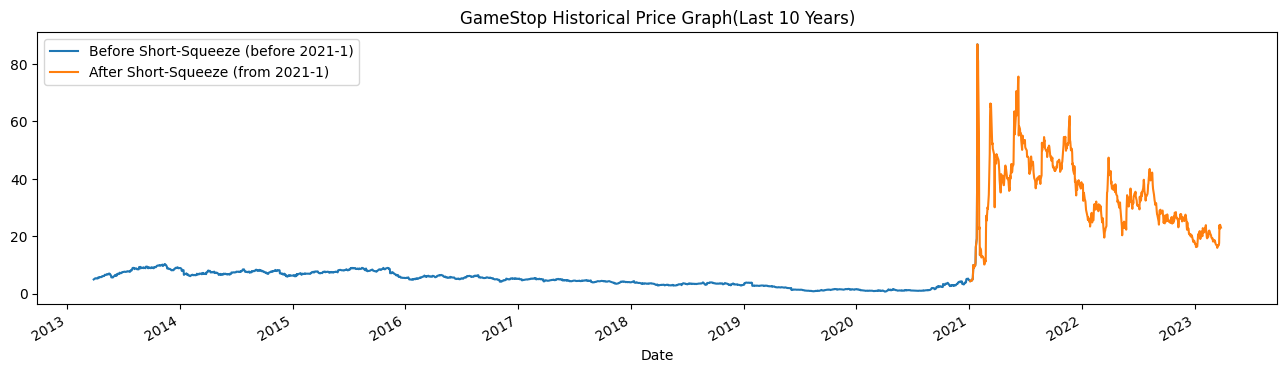

In [17]:
import matplotlib.pyplot as plt
df_gme["Close"][:'2021-1'].plot(figsize=(16,4), legend=True)
df_gme["Close"]["2021-1":].plot(figsize=(16,4), legend=True)
plt.legend(["Before Short-Squeeze (before 2021-1)", "After Short-Squeeze (from 2021-1)"])
plt.title("GameStop Historical Price Graph(Last 10 Years)")
plt.show()
plt.close()

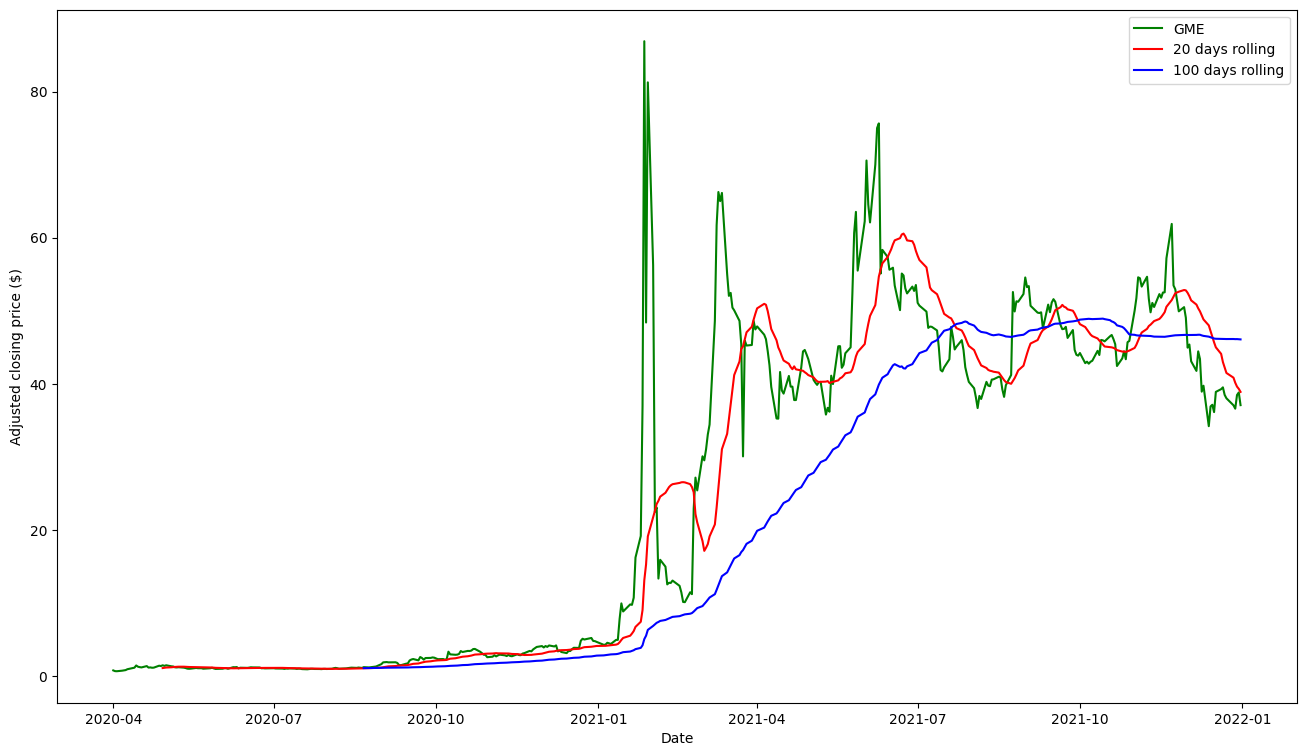

In [18]:
#COMPARING MOVING AVERAGES
df_gme_subset = df_gme["Close"]['2020-4':'2021-12']
short_rolling_gme = df_gme_subset.rolling(window=20).mean()
long_rolling_gme = df_gme_subset.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot( df_gme_subset, label='GME',color = "green")
ax.plot(short_rolling_gme, label='20 days rolling', color = "red")
ax.plot(long_rolling_gme, label='100 days rolling', color = "blue")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [19]:

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/key-metrics/GME?apikey=731a4c8b60b5d3cc7ff6696c9a303e42")



print(get_jsonparsed_data(url))


[{'symbol': 'GME', 'date': '2023-03-02', 'period': 'FY', 'revenuePerShare': 0, 'netIncomePerShare': 0, 'operatingCashFlowPerShare': 0, 'freeCashFlowPerShare': 0, 'cashPerShare': 0, 'bookValuePerShare': 0, 'tangibleBookValuePerShare': 0, 'shareholdersEquityPerShare': 0, 'interestDebtPerShare': 0, 'marketCap': 0, 'enterpriseValue': -522400000, 'peRatio': 0, 'priceToSalesRatio': 0, 'pocfratio': 0, 'pfcfRatio': 0, 'pbRatio': 0, 'ptbRatio': 0, 'evToSales': 0, 'enterpriseValueOverEBITDA': 0, 'evToOperatingCashFlow': 0, 'evToFreeCashFlow': 0, 'earningsYield': None, 'freeCashFlowYield': 0, 'debtToEquity': 1.3545337669212736, 'debtToAssets': 0.5752874670777928, 'netDebtToEBITDA': 0, 'currentRatio': 1.7352699574340975, 'interestCoverage': 0, 'incomeQuality': 0, 'dividendYield': None, 'payoutRatio': 0, 'salesGeneralAndAdministrativeToRevenue': 0, 'researchAndDdevelopementToRevenue': 0, 'intangiblesToTotalAssets': 0, 'capexToOperatingCashFlow': 0, 'capexToRevenue': 0, 'capexToDepreciation': 0, 'st

<ipython-input-19-2370bd4f1f11>:23: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


In [20]:
df_fundamentals = {'date':[],
               'roe':[],
               'peRatio':[],
               'debtToEquity':[],
               'inventoryTurnover':[],
               }

for file in get_jsonparsed_data(url):

  date = file["date"]
  df_fundamentals['date'].append(date)

  roe = file["roe"]
  df_fundamentals['roe'].append(roe)

  peRatio = file["peRatio"]
  df_fundamentals['peRatio'].append(peRatio)

  debtToEquity = file["debtToEquity"]
  df_fundamentals['debtToEquity'].append(debtToEquity)

  inventoryTurnover = file["inventoryTurnover"]
  df_fundamentals['inventoryTurnover'].append(inventoryTurnover)

  



df_fundamentals = pd.DataFrame(df_fundamentals)
df_fundamentals = df_fundamentals[1:11]
df_fundamentals = df_fundamentals.loc[::-1].reset_index(drop=True)
df_fundamentals

<ipython-input-19-2370bd4f1f11>:23: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


,date,roe,peRatio,debtToEquity,inventoryTurnover
0,2013-02-02,-0.117964,-11.571435,0.807987,5.323316
1,2014-02-01,0.157324,11.604190,0.817269,5.320210
2,2015-01-31,0.190115,10.061180,1.053634,5.695405
3,2016-01-30,0.193561,6.897368,1.083085,5.542132
4,2017-01-28,0.156692,7.116801,1.207489,4.992064
5,2018-02-03,0.015669,47.427147,1.276631,4.525134
6,2019-02-02,-0.503667,-1.705207,2.026718,4.779848
7,2020-02-01,-0.770074,-0.713527,3.611120,5.301035
8,2021-01-30,-0.493016,-98.118904,4.662011,6.357344
9,2022-01-29,-0.237941,-18.642187,1.183651,5.096066


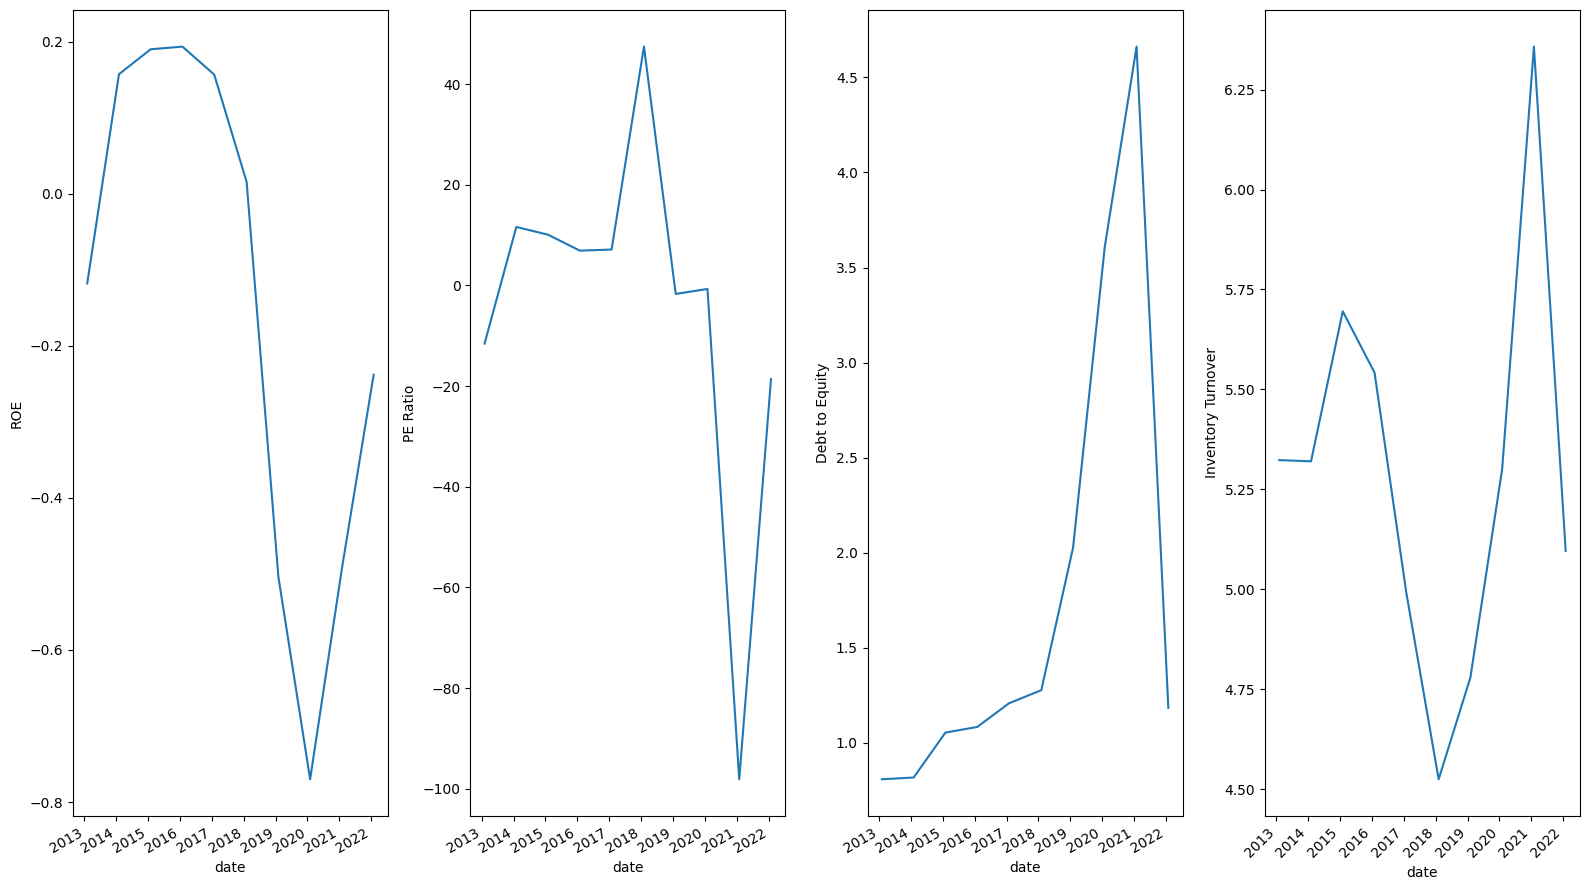

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Set date as the index
df_fundamentals['date'] = pd.to_datetime(df_fundamentals['date'])
df_fundamentals.set_index('date', inplace=True)

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,9))

df_fundamentals['roe'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('ROE')

df_fundamentals['peRatio'].plot(ax=axes[1], legend=False)
axes[1].set_ylabel('PE Ratio')

df_fundamentals['debtToEquity'].plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Debt to Equity')

df_fundamentals['inventoryTurnover'].plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Inventory Turnover')


date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/MGT5399/reddit_wsb.csv')

# Print the first 5 rows of the DataFrame
df

Mounted at /content/drive


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
53182,What I Learned Investigating SAVA FUD Spreaders,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,***TLDR: Three bitter scientists partnered up ...,2021-08-02 15:03:27
53183,"Daily Popular Tickers Thread for August 02, 20...",228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,\nYour daily hype thread. Please keep the shit...,2021-08-02 15:01:03
53184,Hitler reacts to the market being irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,NaN,2021-08-02 13:59:35
53185,"Daily Discussion Thread for August 02, 2021",338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,Your daily trading discussion thread. Please k...,2021-08-02 13:00:16


In [23]:
df = df.dropna(subset=['title', 'body'])
df = df[(~df['title'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (~df['body'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False) | df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]
#titles and bodies that does not contain robinhood or sec but contains
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# sort the DataFrame by the "date" column in ascending order
df = df.sort_values('date', ascending=True)
df

<ipython-input-23-c66e6a411c90>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[(~df['title'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (~df['body'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False) | df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]
<ipython-input-23-c66e6a411c90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['timestamp']).dt.date


,title,score,id,url,comms_num,created,body,timestamp,date
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28
674,Next GameStop. RYCEY ROLLS ROYCE,3,l6wyiq,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611870e+09,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28 23:45:59,2021-01-28
679,RH bans buying GME AMC etc... interactive brok...,0,l6wyid,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611870e+09,[https://ibkr.com/referral/serop525](https://i...,2021-01-28 23:45:59,2021-01-28
688,Give RH one star in app stores!,9,l6wygv,https://www.reddit.com/r/wallstreetbets/commen...,2,1.611870e+09,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28 23:45:56,2021-01-28
692,HOLDHOLDHOLD,13,l6wygd,https://www.reddit.com/r/wallstreetbets/commen...,3,1.611870e+09,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28 23:45:54,2021-01-28
...,...,...,...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,0,p2ltzn,https://www.reddit.com/r/wallstreetbets/commen...,25,1.628715e+09,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11 23:50:57,2021-08-11
52559,Why Ford is Ready to Head towards 50$ starting...,108,p2ilxh,https://www.reddit.com/r/wallstreetbets/commen...,154,1.628705e+09,"^(I'm not a financial advisor, nor am I givin...",2021-08-11 21:09:16,2021-08-11
52491,CLOV🍀 you Irish fucks,753,p32sdk,https://www.reddit.com/r/wallstreetbets/commen...,134,1.628784e+09,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12 19:00:13,2021-08-12
52433,My loss porn this year (-$35k) with current aw...,84,p3mni4,https://www.reddit.com/r/wallstreetbets/commen...,49,1.628867e+09,I'm down almost $20k worth of deposits and -$3...,2021-08-13 18:08:37,2021-08-13


In [24]:
df = df.drop(columns=['url', 'created', 'id', 'score', 'comms_num', 'timestamp'])
df

,title,body,date
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,2021-01-28
674,Next GameStop. RYCEY ROLLS ROYCE,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28
679,RH bans buying GME AMC etc... interactive brok...,[https://ibkr.com/referral/serop525](https://i...,2021-01-28
688,Give RH one star in app stores!,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28
692,HOLDHOLDHOLD,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28
...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11
52559,Why Ford is Ready to Head towards 50$ starting...,"^(I'm not a financial advisor, nor am I givin...",2021-08-11
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13


In [25]:
df_vader = df


In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
# Words to not include in Word Clouds
my_stopwords = set(STOPWORDS)
# Additional phrases I don't want picked up in word clouds
my_stopwords.update(['https', 'http', '\n', '\t'])

In [27]:
def text_clean(mess):
    nopunct = [char for char in mess if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    return nopunct

In [28]:
title_text = text_clean(df['title'])

In [29]:
body_text = text_clean(df['body'])

(-0.5, 399.5, 199.5, -0.5)

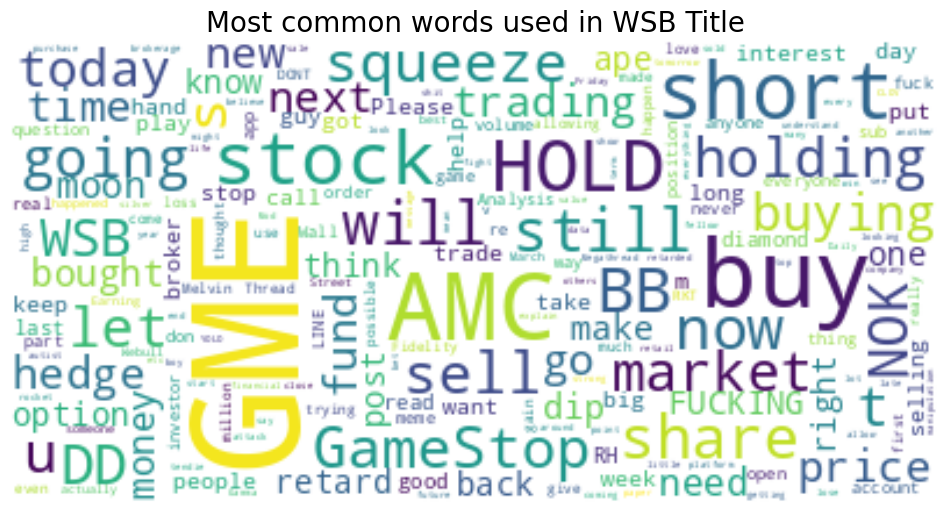

In [30]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(title_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Title', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

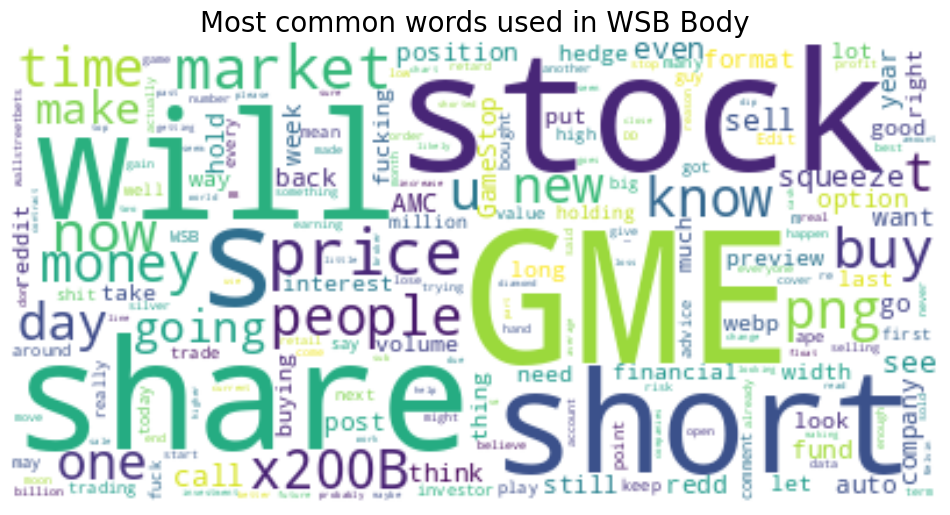

In [31]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(body_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Body', fontsize = 20)
plt.axis('off')

In [32]:
from textblob import TextBlob

# define a function to calculate the sentiment polarity score of a text
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate the sentiment polarity score for each row and take the mean of the "title" and "body" scores
df['sentiment'] = df.apply(lambda row: max(get_sentiment_score(row['title']), get_sentiment_score(row['body'])), axis=1)


In [33]:
df['num_posts'] = df.groupby('date')['title'].transform('count')
df['date'] = pd.to_datetime(df['date'])
df['sentiment_avg'] = df.groupby(df['date'].dt.date)['sentiment'].transform('mean')
df

,title,body,date,sentiment,num_posts,sentiment_avg
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,2021-01-28,0.000000,195,0.140423
674,Next GameStop. RYCEY ROLLS ROYCE,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28,0.000000,195,0.140423
679,RH bans buying GME AMC etc... interactive brok...,[https://ibkr.com/referral/serop525](https://i...,2021-01-28,1.000000,195,0.140423
688,Give RH one star in app stores!,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28,0.000000,195,0.140423
692,HOLDHOLDHOLD,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28,0.000000,195,0.140423
...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11,0.111667,2,0.108565
52559,Why Ford is Ready to Head towards 50$ starting...,"^(I'm not a financial advisor, nor am I givin...",2021-08-11,0.105464,2,0.108565
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12,0.000849,1,0.000849
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13,0.121605,2,0.109846


In [34]:
df_gme['date'] = df_gme.index.date
df_gme['date'] = pd.to_datetime(df_gme['date'])
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2013-03-28 00:00:00-04:00,4.459722,5.063772,4.459722,4.940136,39372800,0.0,0.0,2013-03-28
2013-04-01 00:00:00-04:00,4.945435,5.311043,4.933071,5.256290,28086000,0.0,0.0,2013-04-01
2013-04-02 00:00:00-04:00,5.252759,5.358733,5.132655,5.341070,16349200,0.0,0.0,2013-04-02
2013-04-03 00:00:00-04:00,5.346369,5.406421,5.298681,5.342836,18020400,0.0,0.0,2013-04-03
2013-04-04 00:00:00-04:00,5.335770,5.492965,5.208602,5.279251,17995200,0.0,0.0,2013-04-04
...,...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0,2023-03-21
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0,2023-03-22
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0,2023-03-23


In [35]:
merged_df_gme = pd.merge(df_gme, df, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2021-01-28')
end_date = pd.Timestamp('2021-08-14')
merged_df_gme = merged_df_gme[(merged_df_gme['date'] >= start_date) & (merged_df_gme['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_gme = merged_df_gme.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max','num_posts': 'max'})

# reset the index to include the "date" column
merged_df_gme = merged_df_gme.reset_index()
#merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#USE CLOSING PRICE 
# print the resulting dataframe
merged_df_gme

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,num_posts
0,2021-01-28,66.250000,120.750000,28.062500,48.400002,235263200,0.0,0.0,0.140423,195.0
1,2021-01-29,94.927498,103.495003,62.500000,81.250000,202264400,0.0,0.0,0.135371,2591.0
2,2021-02-01,79.139999,80.500000,53.000000,56.250000,149528800,0.0,0.0,0.118971,170.0
3,2021-02-02,35.189999,39.500000,18.555000,22.500000,312732400,0.0,0.0,0.141535,172.0
4,2021-02-03,28.002501,28.350000,21.312500,23.102501,170794000,0.0,0.0,0.138898,329.0
...,...,...,...,...,...,...,...,...,...,...
133,2021-08-09,37.950001,41.177502,37.665001,40.282501,8996800,0.0,0.0,0.846154,1.0
134,2021-08-10,40.340000,41.724998,38.837502,39.762501,6493200,0.0,0.0,NaN,NaN
135,2021-08-11,39.607498,39.762501,38.654999,39.695000,3781600,0.0,0.0,0.108565,2.0
136,2021-08-12,39.970001,41.070000,39.332500,40.587502,5271200,0.0,0.0,0.000849,1.0


In [36]:
# standardize the variables
merged_df_gme['Volume'] = (merged_df_gme['Volume'] - merged_df_gme['Volume'].mean()) / merged_df_gme['Volume'].std()
merged_df_gme['sentiment_avg'] = (merged_df_gme['sentiment_avg'] - merged_df_gme['sentiment_avg'].mean()) / merged_df_gme['sentiment_avg'].std()
merged_df_gme['num_posts'] = (merged_df_gme['num_posts'] - merged_df_gme['num_posts'].mean()) / merged_df_gme['num_posts'].std()
merged_df_gme['Close'] = (merged_df_gme['Close'] - merged_df_gme['Close'].mean()) / merged_df_gme['Close'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme[['Volume', 'sentiment_avg', 'num_posts', 'Close']].corr()

# display the correlation matrix
print(corr_matrix)

                 Volume  sentiment_avg  num_posts     Close
Volume         1.000000      -0.237255   0.290665 -0.203596
sentiment_avg -0.237255       1.000000  -0.077013  0.067555
num_posts      0.290665      -0.077013   1.000000  0.152740
Close         -0.203596       0.067555   0.152740  1.000000


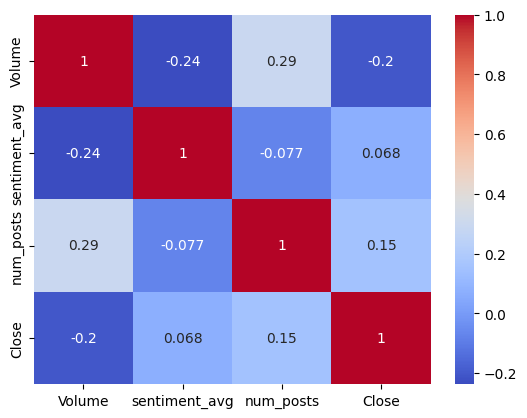

In [37]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

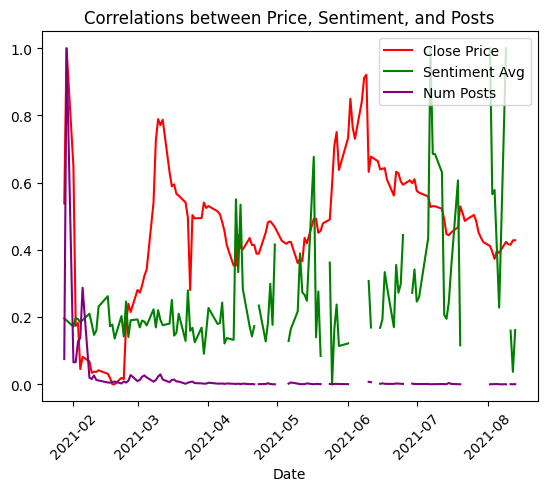

In [38]:
#WITHOUT WINSOR
# normalize the data using min-max scaling
avg_price_norm = (merged_df_gme['Close'] - merged_df_gme['Close'].min()) / (merged_df_gme['Close'].max() - merged_df_gme['Close'].min())
sentiment_norm = (merged_df_gme['sentiment_avg'] - merged_df_gme['sentiment_avg'].min()) / (merged_df_gme['sentiment_avg'].max() - merged_df_gme['sentiment_avg'].min())
posts_norm = (merged_df_gme['num_posts'] - merged_df_gme['num_posts'].min()) / (merged_df_gme['num_posts'].max() - merged_df_gme['num_posts'].min())

# create a figure and axis object
fig, ax = plt.subplots()

# plot the normalized data on the same y-axis
ax.plot(merged_df_gme['date'], avg_price_norm, color='red', label='Close Price')
ax.plot(merged_df_gme['date'], sentiment_norm, color='green', label='Sentiment Avg')
ax.plot(merged_df_gme['date'], posts_norm, color='purple', label='Num Posts')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Sentiment, and Posts')
plt.xticks(rotation=45)
# create a legend
ax.legend()

# display the plot
plt.show()

In [39]:
from scipy.stats.mstats import winsorize

# winsorize the sentiment_avg and num_posts columns
sentiment_winsorized = winsorize(merged_df_gme['sentiment_avg'], limits=[0.1, 0.1])
posts_winsorized = winsorize(merged_df_gme['num_posts'], limits=[0.1, 0.1])

# add the winsorized columns to the merged_df_gme dataframe
merged_df_gme['sentiment_winsorized'] = sentiment_winsorized
merged_df_gme['posts_winsorized'] = posts_winsorized

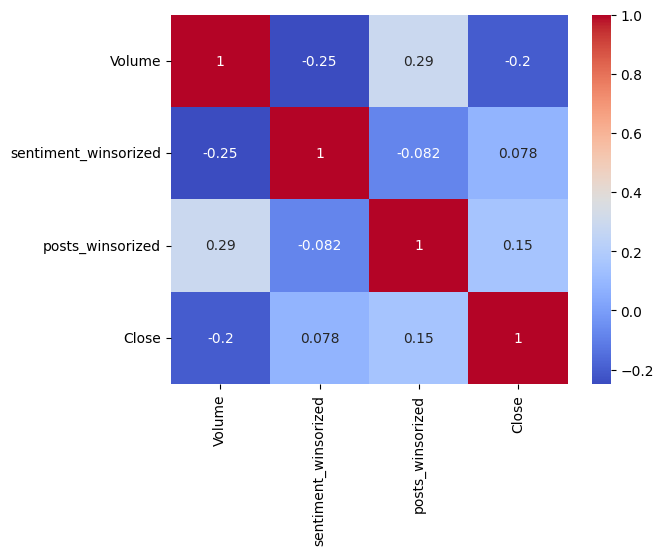

In [40]:
# standardize the variables
merged_df_gme['Volume'] = (merged_df_gme['Volume'] - merged_df_gme['Volume'].mean()) / merged_df_gme['Volume'].std()
merged_df_gme['sentiment_winsorized'] = (merged_df_gme['sentiment_winsorized'] - merged_df_gme['sentiment_winsorized'].mean()) / merged_df_gme['sentiment_winsorized'].std()
merged_df_gme['posts_winsorized'] = (merged_df_gme['posts_winsorized'] - merged_df_gme['posts_winsorized'].mean()) / merged_df_gme['posts_winsorized'].std()
merged_df_gme['Close'] = (merged_df_gme['Close'] - merged_df_gme['Close'].mean()) / merged_df_gme['Close'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme[['Volume', 'sentiment_winsorized', 'posts_winsorized', 'Close']].corr()

# display the correlation matrix
#print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

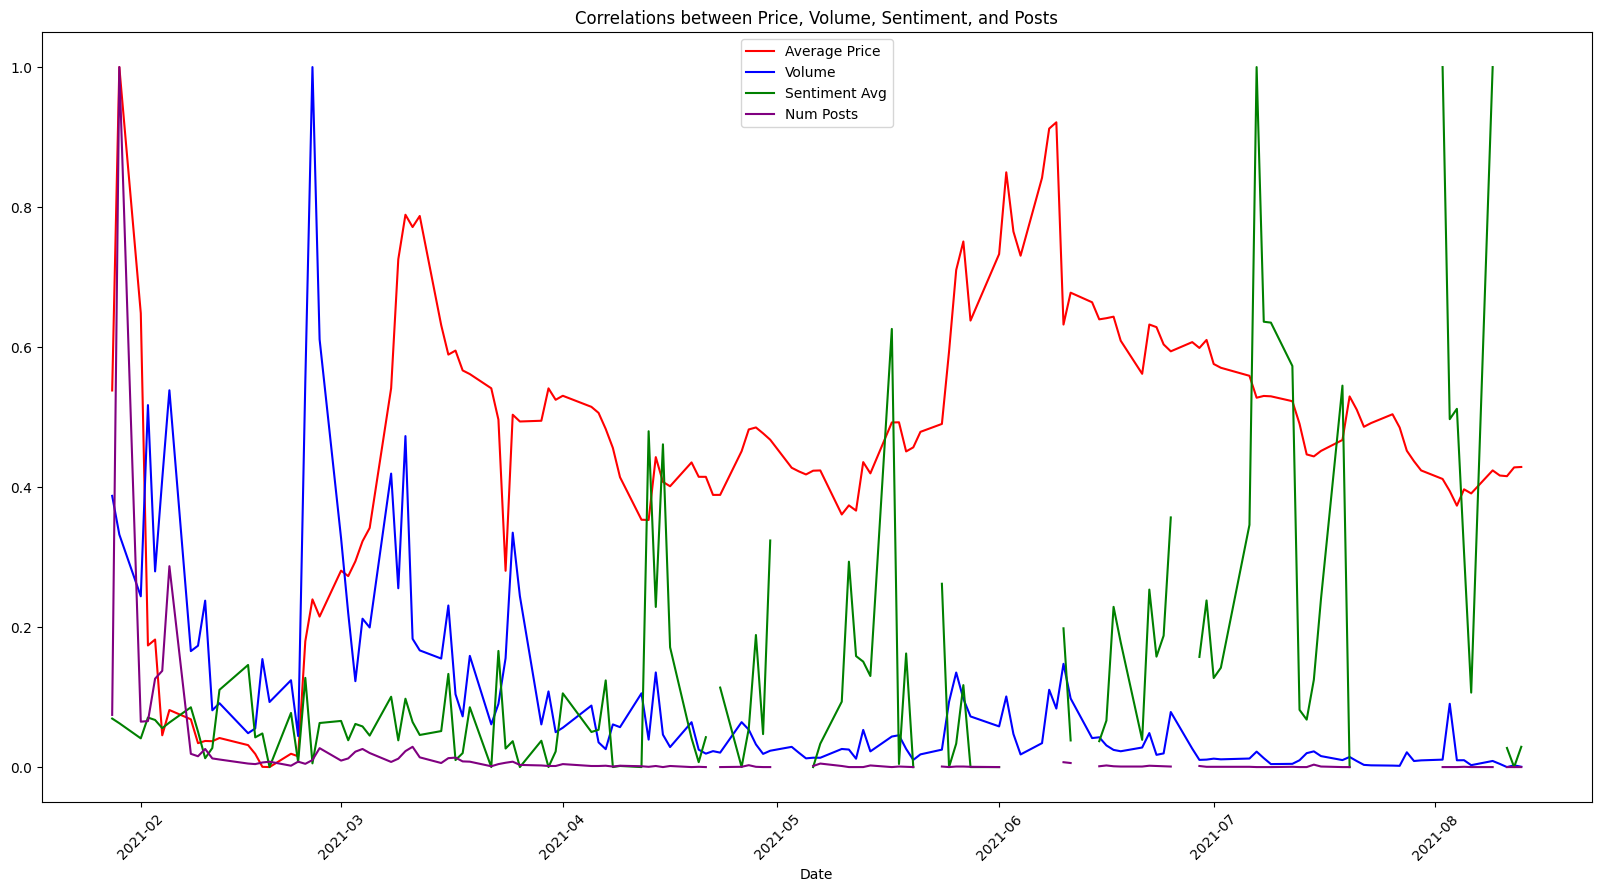

In [41]:

# normalize the data using min-max scaling
avg_price_norm = (merged_df_gme['Close'] - merged_df_gme['Close'].min()) / (merged_df_gme['Close'].max() - merged_df_gme['Close'].min())
volume_norm = (merged_df_gme['Volume'] - merged_df_gme['Volume'].min()) / (merged_df_gme['Volume'].max() - merged_df_gme['Volume'].min())
sentiment_norm = (merged_df_gme['sentiment_winsorized'] - merged_df_gme['sentiment_winsorized'].min()) / (merged_df_gme['sentiment_winsorized'].max() - merged_df_gme['sentiment_winsorized'].min())
posts_norm = (merged_df_gme['posts_winsorized'] - merged_df_gme['posts_winsorized'].min()) / (merged_df_gme['posts_winsorized'].max() - merged_df_gme['posts_winsorized'].min())

# create a figure and axis object
fig, ax = plt.subplots(figsize = (20,10))

# plot the normalized data on the same y-axis
ax.plot(merged_df_gme['date'], avg_price_norm, color='red', label='Average Price')
ax.plot(merged_df_gme['date'], volume_norm, color='blue', label='Volume')
ax.plot(merged_df_gme['date'], sentiment_norm, color='green', label='Sentiment Avg')
ax.plot(merged_df_gme['date'], posts_norm, color='purple', label='Num Posts')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Volume, Sentiment, and Posts')

# create a legend
ax.legend()
plt.xticks(rotation=45)

# display the plot
plt.show()

In [42]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# define a function to get the mean sentiment score for a row
def get_sentiment_score(row):
    title_score = analyzer.polarity_scores(row['title'])['compound']
    body_score = analyzer.polarity_scores(row['body'])['compound']
    return max(title_score,body_score)

# apply the function to each row to get the sentiment score
df_vader['sentiment'] = df_vader.apply(get_sentiment_score, axis=1)

# print the sentiment scores


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [43]:
df_vader['num_posts'] = df_vader.groupby('date')['title'].transform('count')
df_vader['date'] = pd.to_datetime(df_vader['date'])
df_vader['sentiment_avg'] = df_vader.groupby(df_vader['date'].dt.date)['sentiment'].transform('mean')
df_vader

,title,body,date,sentiment,num_posts,sentiment_avg
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,2021-01-28,0.8663,195,0.322414
674,Next GameStop. RYCEY ROLLS ROYCE,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28,0.0000,195,0.322414
679,RH bans buying GME AMC etc... interactive brok...,[https://ibkr.com/referral/serop525](https://i...,2021-01-28,0.7249,195,0.322414
688,Give RH one star in app stores!,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28,0.0000,195,0.322414
692,HOLDHOLDHOLD,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28,0.0000,195,0.322414
...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11,0.9155,2,0.955100
52559,Why Ford is Ready to Head towards 50$ starting...,"^(I'm not a financial advisor, nor am I givin...",2021-08-11,0.9947,2,0.955100
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12,0.9466,1,0.946600
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13,-0.5106,2,0.244500


In [44]:
merged_df_gme_vader = pd.merge(df_gme, df_vader, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2021-01-28')
end_date = pd.Timestamp('2021-08-14')
merged_df_gme_vader = merged_df_gme_vader[(merged_df_gme_vader['date'] >= start_date) & (merged_df_gme_vader['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_gme_vader = merged_df_gme_vader.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max','num_posts': 'max'})

# reset the index to include the "date" column
merged_df_gme_vader = merged_df_gme_vader.reset_index()
#merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#USE CLOSING PRICE 
# print the resulting dataframe
merged_df_gme_vader['PriceChg'] = (merged_df_gme_vader['Close'] - merged_df_gme_vader['Open']) / merged_df_gme_vader['Open']

merged_df_gme_vader

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,num_posts,PriceChg
0,2021-01-28,66.250000,120.750000,28.062500,48.400002,235263200,0.0,0.0,0.322414,195.0,-0.269434
1,2021-01-29,94.927498,103.495003,62.500000,81.250000,202264400,0.0,0.0,0.260548,2591.0,-0.144084
2,2021-02-01,79.139999,80.500000,53.000000,56.250000,149528800,0.0,0.0,0.581149,170.0,-0.289234
3,2021-02-02,35.189999,39.500000,18.555000,22.500000,312732400,0.0,0.0,0.484962,172.0,-0.360614
4,2021-02-03,28.002501,28.350000,21.312500,23.102501,170794000,0.0,0.0,0.508395,329.0,-0.174984
...,...,...,...,...,...,...,...,...,...,...,...
133,2021-08-09,37.950001,41.177502,37.665001,40.282501,8996800,0.0,0.0,0.504000,1.0,0.061462
134,2021-08-10,40.340000,41.724998,38.837502,39.762501,6493200,0.0,0.0,NaN,NaN,-0.014316
135,2021-08-11,39.607498,39.762501,38.654999,39.695000,3781600,0.0,0.0,0.955100,2.0,0.002209
136,2021-08-12,39.970001,41.070000,39.332500,40.587502,5271200,0.0,0.0,0.946600,1.0,0.015449


                 Volume  sentiment_avg  num_posts     Close  PriceChg
Volume         1.000000      -0.329706   0.290665 -0.203596 -0.023527
sentiment_avg -0.329706       1.000000  -0.300743  0.087032  0.147226
num_posts      0.290665      -0.300743   1.000000  0.152740 -0.128538
Close         -0.203596       0.087032   0.152740  1.000000  0.081852
PriceChg      -0.023527       0.147226  -0.128538  0.081852  1.000000


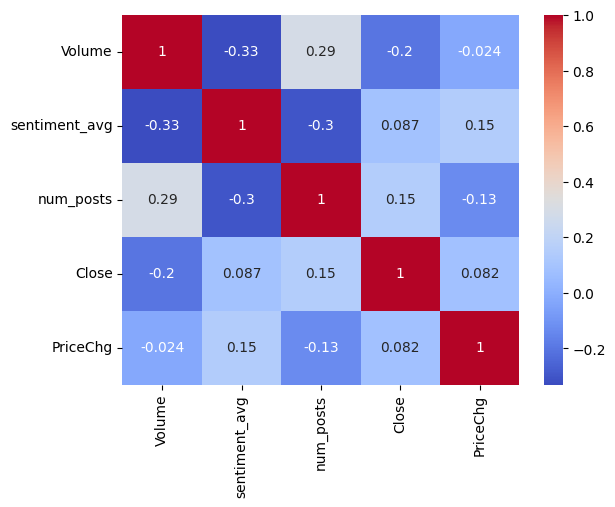

In [45]:
merged_df_gme_vader['Volume'] = (merged_df_gme_vader['Volume'] - merged_df_gme_vader['Volume'].mean()) / merged_df_gme_vader['Volume'].std()
merged_df_gme_vader['sentiment_avg'] = (merged_df_gme_vader['sentiment_avg'] - merged_df_gme_vader['sentiment_avg'].mean()) / merged_df_gme_vader['sentiment_avg'].std()
merged_df_gme_vader['num_posts'] = (merged_df_gme_vader['num_posts'] - merged_df_gme_vader['num_posts'].mean()) / merged_df_gme_vader['num_posts'].std()
merged_df_gme_vader['Close'] = (merged_df_gme_vader['Close'] - merged_df_gme_vader['Close'].mean()) / merged_df_gme_vader['Close'].std()
merged_df_gme_vader['PriceChg'] = (merged_df_gme_vader['PriceChg'] - merged_df_gme_vader['PriceChg'].mean()) / merged_df_gme_vader['PriceChg'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme_vader[['Volume', 'sentiment_avg', 'num_posts', 'Close','PriceChg']].corr()

# display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

In [46]:
!pip install --upgrade pip
!pip install pygooglenews --no-deps
!pip install feedparser
!pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=3d3573696c8bf3a8ae5bef7340a4bd2522bf843a760d4b59922b9ee33ff86bc3
  Stored in directory: /root/.cache/pip/wheels/65/7a/a7/78c287f64e401255dff4c13fdbc672fed5efbfd21c530114e1
Successfully built sgmllib3k
ERROR: pip's dependency resolver does not currently take into account

In [47]:
from pygooglenews import GoogleNews
gn = GoogleNews()
search = gn.search('Gamestop', when = '8d',helper = False)

# Create a list to hold the data
data = []

# Iterate through each article in the search results
for article in search['entries']:
    # Extract the title and date strings
    title = article['title']
    raw_date = article['published']

    # Convert the date string to a datetime object
    date = pd.to_datetime(raw_date)

    # Format the datetime object as a string in the YYYY-MM-DD format
    date_str = date.strftime('%Y-%m-%d')

    # Add the title, raw date, and formatted date to the data list
    data.append([title, raw_date, date_str])

# Create a DataFrame from the data list
df_news = pd.DataFrame(data, columns=['Title', 'Raw Date', 'Date'])

# Sort the DataFrame by the Raw Date column in descending order
df_news = df_news.sort_values(by='Raw Date', ascending=False)

# Print the sorted DataFrame
df_news


,Title,Raw Date,Date
7,Gaming Industry Analyst Nick McKay Discusses E...,"Wed, 05 Apr 2023 23:49:44 GMT",2023-04-05
52,DataBank Secures Another $325M in Financing to...,"Wed, 05 Apr 2023 23:17:10 GMT",2023-04-05
53,Top 15 Trending Stocks on WallStreetBets - Bes...,"Wed, 05 Apr 2023 22:19:58 GMT",2023-04-05
64,"Marketmind: RBA steady, RBNZ hawk shock, next ...","Wed, 05 Apr 2023 21:48:41 GMT",2023-04-05
2,Unusual Put Option Trade in GameStop (GME) Wor...,"Wed, 05 Apr 2023 21:15:00 GMT",2023-04-05
...,...,...,...
96,Taxes 2023: How To Get Back on Track With the ...,"Fri, 31 Mar 2023 13:02:44 GMT",2023-03-31
88,Shiba Inu: 'Puppynet' Processes 1 Million Tran...,"Fri, 31 Mar 2023 12:29:10 GMT",2023-03-31
24,AMC Stock: Amazon Acquisition Rumors Add More ...,"Fri, 31 Mar 2023 10:49:19 GMT",2023-03-31
41,"Bed, Bath & Beyond is making a $300 million ef...","Fri, 31 Mar 2023 09:38:00 GMT",2023-03-31


In [48]:
!pip install finnhub-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import finnhub
finnhub_client = finnhub.Client(api_key="cgmsun9r01qhveussecgcgmsun9r01qhveussed0")

news = finnhub_client.company_news('GME', _from="2022-01-01", to="2023-04-01")


# create dataframe
df_finhub = pd.DataFrame(news, columns=["headline", "datetime","summary","url"])

# convert datetime to 2023-01-01 format
df_finhub["datetime"] = pd.to_datetime(df_finhub["datetime"], unit='s').dt.strftime('%Y-%m-%d')

# display dataframe
df_finhub

,headline,datetime,summary,url
0,Bed Bath & Beyond stock closes at all-time low...,2023-03-31,Bed Bath & Beyond’s (BBBY) stock ended the qua...,https://finnhub.io/api/news?id=d03a329c5508980...
1,Bed Bath & Beyond stock closes at all-time low...,2023-03-31,Bed Bath & Beyond’s (BBBY) stock ended the qua...,https://finnhub.io/api/news?id=910da117753be56...
2,Teaching Financial Literacy: Why You Need to S...,2023-03-31,Teaching financial literacy to kids can help t...,https://finnhub.io/api/news?id=c21183d7cd12817...
3,There May Be Hope on the Horizon for GameStop ...,2023-03-31,A position in video game retailer GameStop (NY...,https://finnhub.io/api/news?id=7b04b55f6758c95...
4,How To Avoid Losing Money Through The Volatility,2023-03-31,"Kirk Spano, who runs Margin of Safety Investin...",https://finnhub.io/api/news?id=93225b2da0a47bb...
...,...,...,...,...
219,SEC Filing: Michael Burry Bought These Under-T...,2023-02-15,Michael Burry is among the best value investor...,https://finnhub.io/api/news?id=44fc7f665718d32...
220,Want to play the lottery? These are the most s...,2023-02-15,Looking for stock market analysis and research...,https://finnhub.io/api/news?id=6adc136a28810b0...
221,3 Stocks to Sell Before the Dot-Com Crash 2.0,2023-02-15,Looking for stock market analysis and research...,https://finnhub.io/api/news?id=039a522fec3f958...
222,Wall Street watchdog set to adopt rules aimed ...,2023-02-15,Wall Street's top regulator was poised Wednesd...,https://finnhub.io/api/news?id=23a1f918ccdbf8e...


In [50]:

# initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# define a function to get the mean sentiment score for a row
def get_sentiment_score(row):
    title_score = analyzer.polarity_scores(row['headline'])['compound']
    return title_score

# apply the function to each row to get the sentiment score
df_finhub['sentiment'] = df_finhub.apply(get_sentiment_score, axis=1)

df_finhub['datetime'] = pd.to_datetime(df_finhub['datetime'])
df_finhub['sentiment_avg'] = df_finhub.groupby(df_finhub['datetime'].dt.date)['sentiment'].transform('mean')
df_finhub.rename(columns={'datetime': 'date'}, inplace=True)
df_finhub


,headline,date,summary,url,sentiment,sentiment_avg
0,Bed Bath & Beyond stock closes at all-time low...,2023-03-31,Bed Bath & Beyond’s (BBBY) stock ended the qua...,https://finnhub.io/api/news?id=d03a329c5508980...,-0.2732,-0.242817
1,Bed Bath & Beyond stock closes at all-time low...,2023-03-31,Bed Bath & Beyond’s (BBBY) stock ended the qua...,https://finnhub.io/api/news?id=910da117753be56...,-0.2732,-0.242817
2,Teaching Financial Literacy: Why You Need to S...,2023-03-31,Teaching financial literacy to kids can help t...,https://finnhub.io/api/news?id=c21183d7cd12817...,0.0000,-0.242817
3,There May Be Hope on the Horizon for GameStop ...,2023-03-31,A position in video game retailer GameStop (NY...,https://finnhub.io/api/news?id=7b04b55f6758c95...,0.4404,-0.242817
4,How To Avoid Losing Money Through The Volatility,2023-03-31,"Kirk Spano, who runs Margin of Safety Investin...",https://finnhub.io/api/news?id=93225b2da0a47bb...,-0.5859,-0.242817
...,...,...,...,...,...,...
219,SEC Filing: Michael Burry Bought These Under-T...,2023-02-15,Michael Burry is among the best value investor...,https://finnhub.io/api/news?id=44fc7f665718d32...,0.0000,0.003000
220,Want to play the lottery? These are the most s...,2023-02-15,Looking for stock market analysis and research...,https://finnhub.io/api/news?id=6adc136a28810b0...,0.5256,0.003000
221,3 Stocks to Sell Before the Dot-Com Crash 2.0,2023-02-15,Looking for stock market analysis and research...,https://finnhub.io/api/news?id=039a522fec3f958...,-0.4019,0.003000
222,Wall Street watchdog set to adopt rules aimed ...,2023-02-15,Wall Street's top regulator was poised Wednesd...,https://finnhub.io/api/news?id=23a1f918ccdbf8e...,-0.1027,0.003000


In [51]:
merged_df_gme_vader_finhub = pd.merge(df_gme, df_finhub, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2023-02-14')
end_date = pd.Timestamp('2023-03-31')
merged_df_gme_vader_finhub = merged_df_gme_vader_finhub[(merged_df_gme_vader_finhub['date'] >= start_date) & (merged_df_gme_vader_finhub['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_gme_vader_finhub = merged_df_gme_vader_finhub.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max'})

# reset the index to include the "date" column
merged_df_gme_vader_finhub = merged_df_gme_vader_finhub.reset_index()
#merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#USE CLOSING PRICE 
# print the resulting dataframe
merged_df_gme_vader_finhub['PriceChg'] = (merged_df_gme_vader_finhub['Close'] - merged_df_gme_vader_finhub['Open']) / merged_df_gme_vader_finhub['Open']

merged_df_gme_vader_finhub

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,PriceChg
0,2023-02-14,19.309999,20.010000,19.100000,19.870001,2746300,0.0,0.0,0.000000,0.029001
1,2023-02-15,19.799999,21.799999,19.590000,21.799999,7137800,0.0,0.0,0.003000,0.101010
2,2023-02-16,21.250000,22.420000,20.850000,21.600000,3879000,0.0,0.0,-0.159980,0.016471
3,2023-02-17,21.270000,22.070000,21.150000,21.990000,2851000,0.0,0.0,-0.162533,0.033850
4,2023-02-21,21.330000,21.830000,20.629999,20.660000,3100300,0.0,0.0,-0.261950,-0.031411
5,2023-02-22,20.530001,21.190001,20.330000,20.520000,2164900,0.0,0.0,0.000000,-0.000487
6,2023-02-23,20.660000,20.870001,19.530001,20.139999,2862000,0.0,0.0,0.000000,-0.025169
7,2023-02-24,19.709999,20.080000,19.540001,19.540001,2277600,0.0,0.0,-0.060767,-0.008625
8,2023-02-27,19.610001,19.700001,18.889999,19.100000,4006700,0.0,0.0,0.273200,-0.026007
9,2023-02-28,19.059999,19.520000,18.950001,19.230000,3373800,0.0,0.0,0.131400,0.008919


                 Volume  sentiment_avg     Close  PriceChg
Volume         1.000000       0.121527  0.416256 -0.413216
sentiment_avg  0.121527       1.000000 -0.133214 -0.170256
Close          0.416256      -0.133214  1.000000  0.071177
PriceChg      -0.413216      -0.170256  0.071177  1.000000


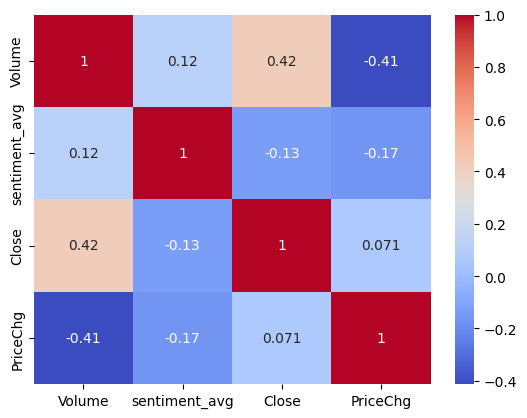

In [52]:
merged_df_gme_vader_finhub['Volume'] = (merged_df_gme_vader_finhub['Volume'] - merged_df_gme_vader_finhub['Volume'].mean()) / merged_df_gme_vader_finhub['Volume'].std()
merged_df_gme_vader_finhub['sentiment_avg'] = (merged_df_gme_vader_finhub['sentiment_avg'] - merged_df_gme_vader_finhub['sentiment_avg'].mean()) / merged_df_gme_vader_finhub['sentiment_avg'].std()
merged_df_gme_vader_finhub['Close'] = (merged_df_gme_vader_finhub['Close'] - merged_df_gme_vader_finhub['Close'].mean()) / merged_df_gme_vader_finhub['Close'].std()
merged_df_gme_vader_finhub['PriceChg'] = (merged_df_gme_vader_finhub['PriceChg'] - merged_df_gme_vader_finhub['PriceChg'].mean()) / merged_df_gme_vader_finhub['PriceChg'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme_vader_finhub[['Volume', 'sentiment_avg', 'Close','PriceChg']].corr()

# display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

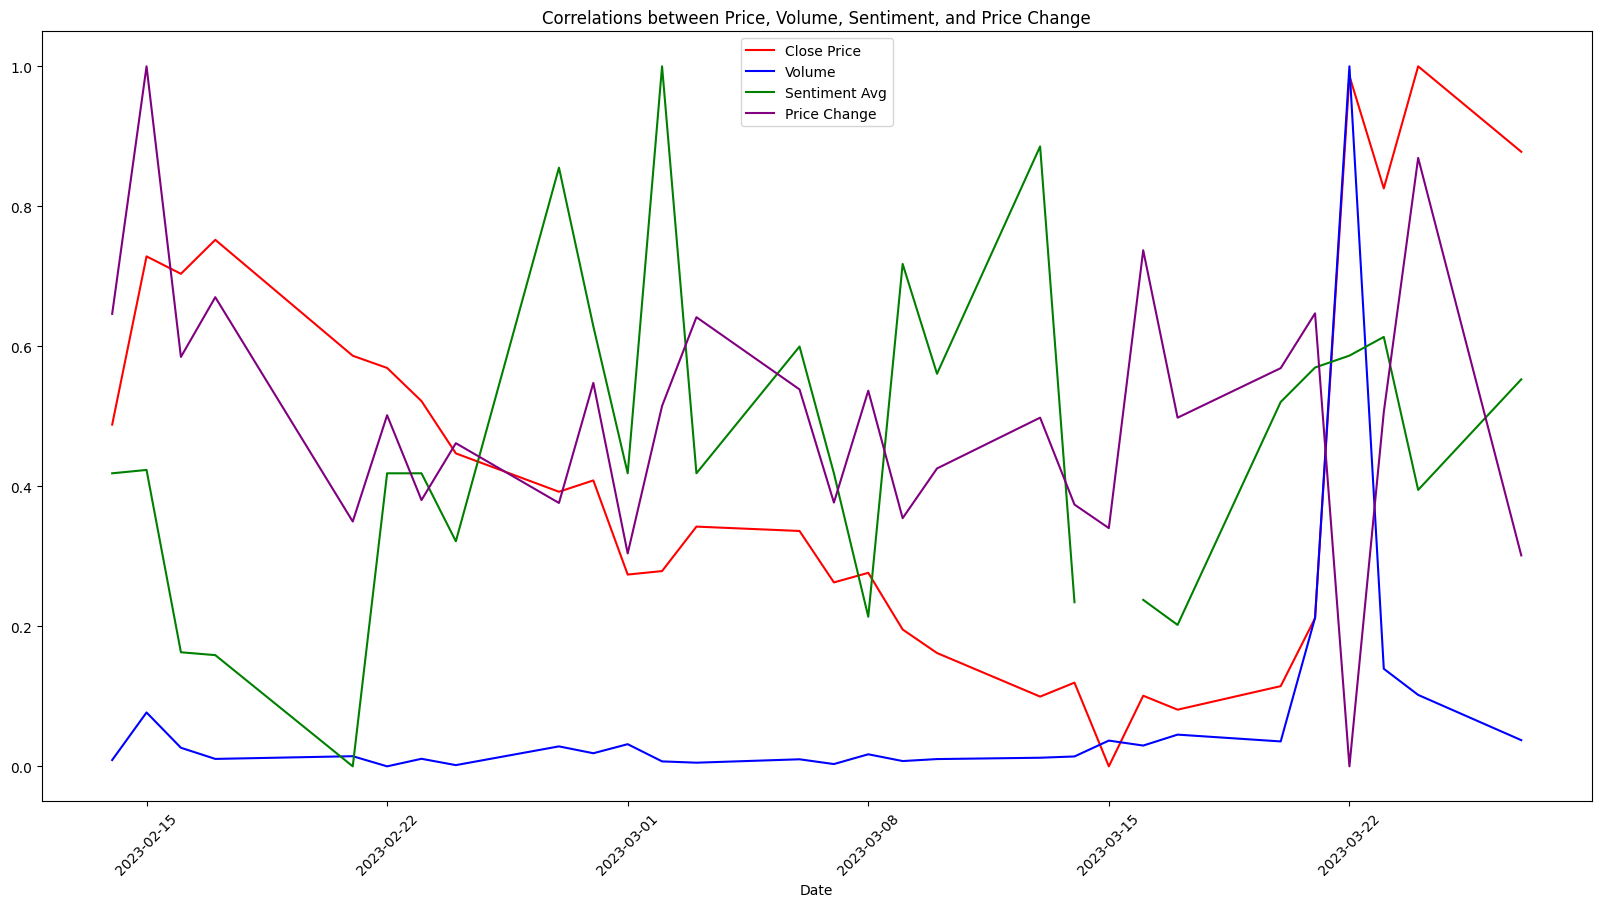

In [53]:
# normalize the data using min-max scaling
avg_price_norm = (merged_df_gme_vader_finhub['Close'] - merged_df_gme_vader_finhub['Close'].min()) / (merged_df_gme_vader_finhub['Close'].max() - merged_df_gme_vader_finhub['Close'].min())
volume_norm = (merged_df_gme_vader_finhub['Volume'] - merged_df_gme_vader_finhub['Volume'].min()) / (merged_df_gme_vader_finhub['Volume'].max() - merged_df_gme_vader_finhub['Volume'].min())
sentiment_norm = (merged_df_gme_vader_finhub['sentiment_avg'] - merged_df_gme_vader_finhub['sentiment_avg'].min()) / (merged_df_gme_vader_finhub['sentiment_avg'].max() - merged_df_gme_vader_finhub['sentiment_avg'].min())
posts_norm = (merged_df_gme_vader_finhub['PriceChg'] - merged_df_gme_vader_finhub['PriceChg'].min()) / (merged_df_gme_vader_finhub['PriceChg'].max() - merged_df_gme_vader_finhub['PriceChg'].min())

# create a figure and axis object
fig, ax = plt.subplots(figsize = (20,10))

# plot the normalized data on the same y-axis
ax.plot(merged_df_gme_vader_finhub['date'], avg_price_norm, color='red', label='Close Price')
ax.plot(merged_df_gme_vader_finhub['date'], volume_norm, color='blue', label='Volume')
ax.plot(merged_df_gme_vader_finhub['date'], sentiment_norm, color='green', label='Sentiment Avg')
ax.plot(merged_df_gme_vader_finhub['date'], posts_norm, color='purple', label='Price Change')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Volume, Sentiment, and Price Change')

# create a legend
ax.legend()
plt.xticks(rotation=45)

# display the plot
plt.show()

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 4.4 MB/s eta 0:00:00


In [116]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Set up the queries and limits for the two loops
query1 = "Gamestop since:2021-12-05 until:2021-12-11 -filter:retweets"
query2 = "Gamestop since:2021-11-28 until:2021-12-04 -filter:retweets"
query3 = "Gamestop since:2021-11-21 until:2021-11-27 -filter:retweets"

limit1 = 15000
limit2 = 15000
limit3 = 15000

# Loop 1: search for tweets in the first date range
tweets1 = []
for tweet in sntwitter.TwitterSearchScraper(query1).get_items():
    if len(tweets1) == limit1:
        break
    else:
        tweets1.append([tweet.date, tweet.content])
    if len(tweets1) == 500:
        print(500)
    if len(tweets1) == 10000:
        print(10000)

# Loop 2: search for tweets in the second date range
tweets2 = []
for tweet in sntwitter.TwitterSearchScraper(query2).get_items():
    if len(tweets2) == limit2:
        break
    else:
        tweets2.append([tweet.date, tweet.content])
    if len(tweets2) == 500:
        print(500)
    if len(tweets2) == 10000:
        print(10000)
tweets3 = []
for tweet in sntwitter.TwitterSearchScraper(query3).get_items():
    if len(tweets3) == limit3:
        break
    else:
        tweets3.append([tweet.date, tweet.content])
    if len(tweets3) == 500:
        print(500)
    if len(tweets3) == 10000:
        print(10000)

# Merge the results into one dataframe
tweets = tweets1 + tweets2 + tweets3
df_twitter = pd.DataFrame(tweets, columns=['date', 'Tweet'])

<ipython-input-116-a1d333d9a19e>:19: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets1.append([tweet.date, tweet.content])


500
10000


<ipython-input-116-a1d333d9a19e>:31: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets2.append([tweet.date, tweet.content])


500
10000


<ipython-input-116-a1d333d9a19e>:41: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets3.append([tweet.date, tweet.content])


500
10000


In [117]:
# initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# define a function to get the mean sentiment score for a row
def get_sentiment_score(row):
    title_score = analyzer.polarity_scores(row['Tweet'])['compound']
    return title_score

# convert the 'date' column to datetime
df_twitter['date'] = pd.to_datetime(df_twitter['date'])

# apply the function to each row to get the sentiment score
df_twitter['sentiment'] = df_twitter.apply(get_sentiment_score, axis=1)

# drop rows where sentiment == 0
df_twitter = df_twitter[df_twitter['sentiment'] != 0]

# extract the date from the datetime column and convert it to a string
df_twitter['date'] = df_twitter['date'].dt.strftime('%Y-%m-%d')

# calculate the mean sentiment score for each date
df_twitter['sentiment_avg'] = df_twitter.groupby('date')['sentiment'].transform('mean')

# print the updated dataframe
df_twitter

,date,Tweet,sentiment,sentiment_avg
2,2021-12-10,@rukizzel @aroflip @GameStop @backbone Getting...,-0.0772,0.169505
3,2021-12-10,@xZack_AtTaCkx @Leponic @dtortorice @LordOfRes...,0.2057,0.169505
5,2021-12-10,"@JPSWITCHMANIA Yep, got it at GameStop years ago.",0.2960,0.169505
6,2021-12-10,@squawksquare I was just glad it wasn’t anothe...,0.4588,0.169505
7,2021-12-10,You guys left me a voicemail saying it was del...,0.2500,0.169505
...,...,...,...,...
40816,2021-11-21,There's this controller I want from gamestop a...,0.0772,0.075729
40817,2021-11-21,@Xx_WiReD_xX @CEOAdam @ryancohen When the game...,-0.0258,0.075729
40818,2021-11-21,@__ZionLion__ @GameStop WAIT YOU ACTUALLY THIN...,-0.8822,0.075729
40819,2021-11-21,@radio2payme @GameStop thank you dear 🙏,0.6249,0.075729


In [118]:
df_twitter['date'] = pd.to_datetime(df_twitter['date'], format='%Y-%m-%d')
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23433 entries, 2 to 40820
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           23433 non-null  datetime64[ns]
 1   Tweet          23433 non-null  object        
 2   sentiment      23433 non-null  float64       
 3   sentiment_avg  23433 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 915.4+ KB


In [119]:
df_gme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-03-28 00:00:00-04:00 to 2023-03-27 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          2517 non-null   float64       
 1   High          2517 non-null   float64       
 2   Low           2517 non-null   float64       
 3   Close         2517 non-null   float64       
 4   Volume        2517 non-null   int64         
 5   Dividends     2517 non-null   float64       
 6   Stock Splits  2517 non-null   float64       
 7   date          2517 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 241.5 KB


In [120]:
merged_df_twitter = pd.merge(df_gme, df_twitter, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2021-11-28')
end_date = pd.Timestamp('2021-12-10')
merged_df_twitter = merged_df_twitter[(merged_df_twitter['date'] >= start_date) & (merged_df_twitter['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_twitter = merged_df_twitter.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max'})

# reset the index to include the "date" column
merged_df_twitter = merged_df_twitter.reset_index()
#merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#USE CLOSING PRICE 
# print the resulting dataframe
merged_df_twitter['PriceChg'] = (merged_df_twitter['Close'] - merged_df_twitter['Open']) / merged_df_twitter['Open']

merged_df_twitter

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,PriceChg
0,2021-11-29,51.000000,51.977501,50.235001,50.502499,4435200,0.0,0.0,0.219444,-0.009755
1,2021-11-30,50.025002,50.987499,47.000000,49.052502,6895600,0.0,0.0,0.184353,-0.019440
2,2021-12-01,49.849998,50.027500,44.252499,44.959999,9406000,0.0,0.0,0.191258,-0.098094
3,2021-12-02,46.250000,46.857498,43.267502,45.389999,8348400,0.0,0.0,0.193665,-0.018595
4,2021-12-03,45.250000,45.982498,39.762501,43.097500,16386800,0.0,0.0,0.179243,-0.047569
5,2021-12-06,41.500000,43.334999,40.799999,41.779999,8914400,0.0,0.0,0.216586,0.006747
6,2021-12-07,43.794998,45.494999,42.627499,44.452499,7889600,0.0,0.0,0.216635,0.015013
7,2021-12-08,44.150002,45.062500,42.990002,43.412498,10444800,0.0,0.0,0.160137,-0.016704
8,2021-12-09,41.750000,43.172501,37.750000,38.939999,20337200,0.0,0.0,0.104133,-0.067305
9,2021-12-10,39.957500,40.575001,37.000000,39.752499,18107600,0.0,0.0,0.169505,-0.005130


                 Volume  sentiment_avg     Close  PriceChg
Volume         1.000000      -0.794693 -0.849632 -0.357020
sentiment_avg -0.794693       1.000000  0.598630  0.498209
Close         -0.849632       0.598630  1.000000  0.139146
PriceChg      -0.357020       0.498209  0.139146  1.000000


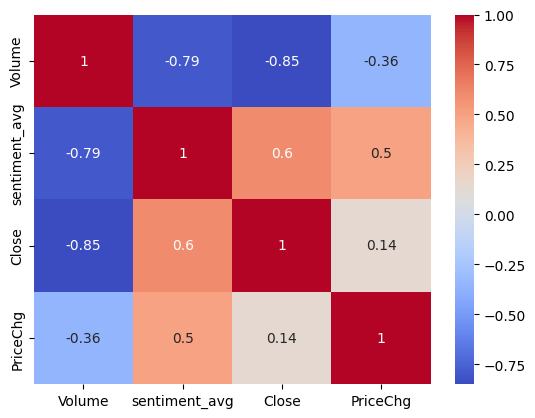

In [121]:
merged_df_twitter['Volume'] = (merged_df_twitter['Volume'] - merged_df_twitter['Volume'].mean()) / merged_df_twitter['Volume'].std()
merged_df_twitter['sentiment_avg'] = (merged_df_twitter['sentiment_avg'] - merged_df_twitter['sentiment_avg'].mean()) / merged_df_twitter['sentiment_avg'].std()
merged_df_twitter['Close'] = (merged_df_twitter['Close'] - merged_df_twitter['Close'].mean()) / merged_df_twitter['Close'].std()
merged_df_twitter['PriceChg'] = (merged_df_twitter['PriceChg'] - merged_df_twitter['PriceChg'].mean()) / merged_df_twitter['PriceChg'].std()

# compute the correlation matrix
corr_matrix = merged_df_twitter[['Volume', 'sentiment_avg', 'Close','PriceChg']].corr()

# display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

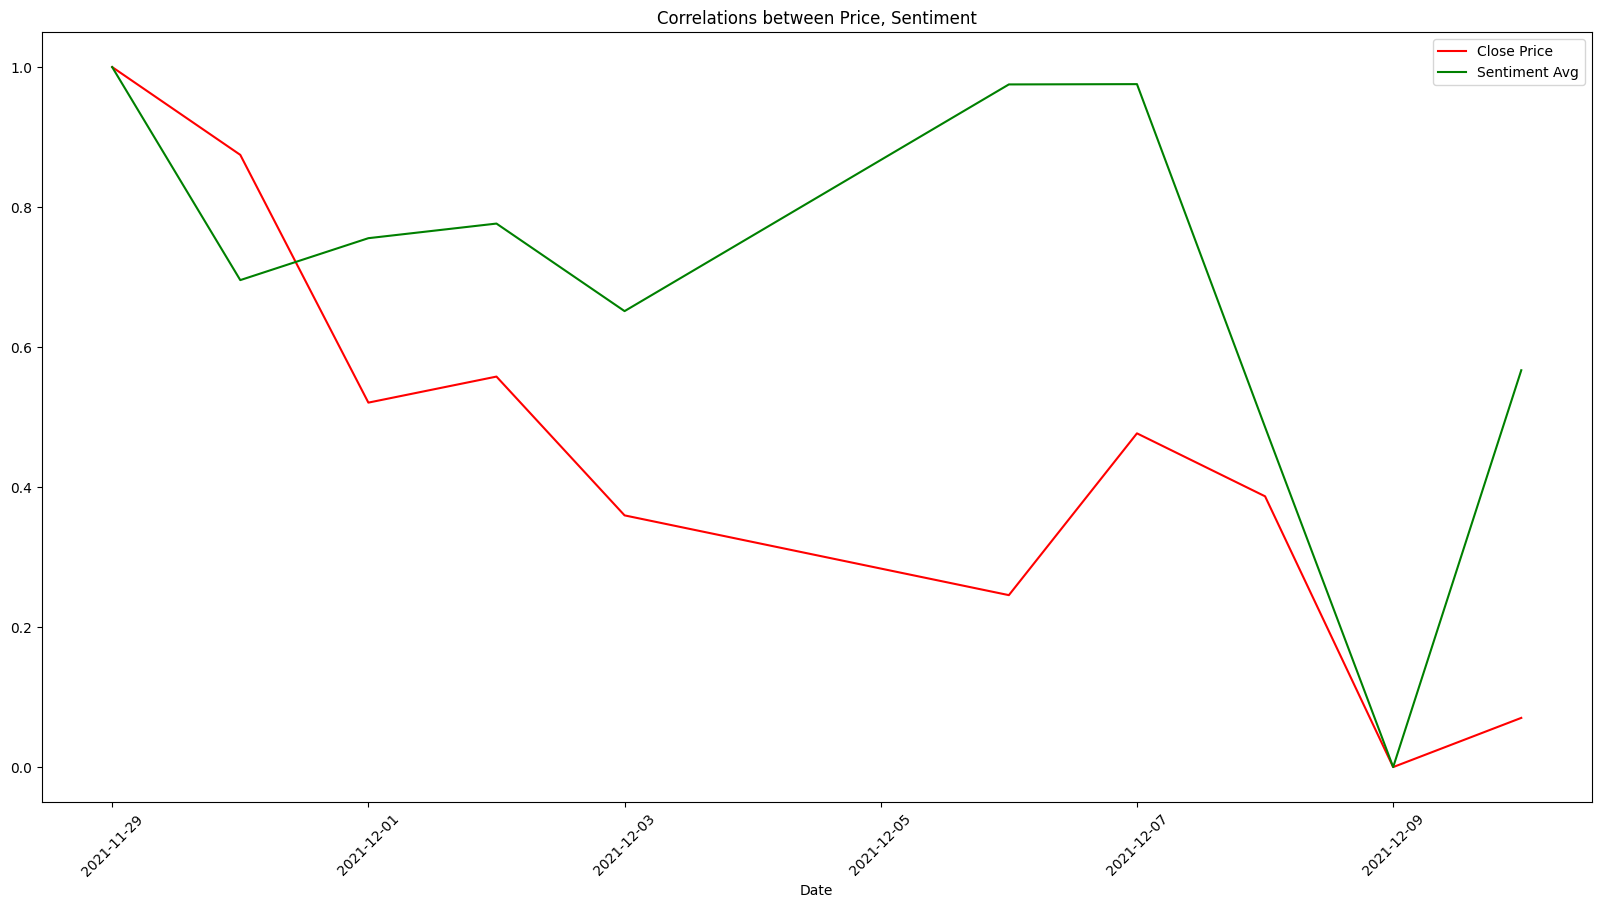

In [122]:
# normalize the data using min-max scaling
avg_price_norm = (merged_df_twitter['Close'] - merged_df_twitter['Close'].min()) / (merged_df_twitter['Close'].max() - merged_df_twitter['Close'].min())
sentiment_norm = (merged_df_twitter['sentiment_avg'] - merged_df_twitter['sentiment_avg'].min()) / (merged_df_twitter['sentiment_avg'].max() - merged_df_twitter['sentiment_avg'].min())

# create a figure and axis object
fig, ax = plt.subplots(figsize = (20,10))

# plot the normalized data on the same y-axis
ax.plot(merged_df_twitter['date'], avg_price_norm, color='red', label='Close Price')
ax.plot(merged_df_twitter['date'], sentiment_norm, color='green', label='Sentiment Avg')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Sentiment')

# create a legend
ax.legend()
plt.xticks(rotation=45)

# display the plot
plt.show()